<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Evaluating K-Means Clusters with the Iris Dataset

_Authors: Joseph Nelson (DC)_

---

Below you will practice using K-Means clustering and the various evaluation strategies we covered on the famous Iris dataset.

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster, metrics
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 
from sklearn import datasets

### 1: Import and format the data

Both sklearn and seaborn have ways to import the iris data:
- `sklearn.datasets.load_iris()`
- `sns.load_dataset("iris")`

The seaborn way is easier.

In [2]:
# The Hard Way
iris = datasets.load_iris()

In [3]:
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

In [4]:
# The Easy Way

In [5]:
import seaborn as sns
sns_iris = sns.load_dataset("iris")

In [6]:
sns_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
X = sns_iris.iloc[:, :-1]
y = sns_iris.species

### 2. Plot the data to visually estimate to correct number of clusters

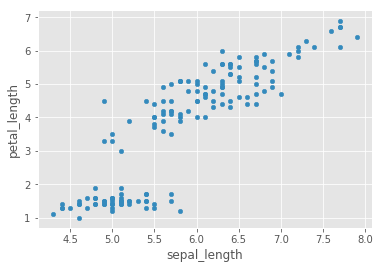

In [8]:
X.plot(kind='scatter', x='sepal_length', y='petal_length')

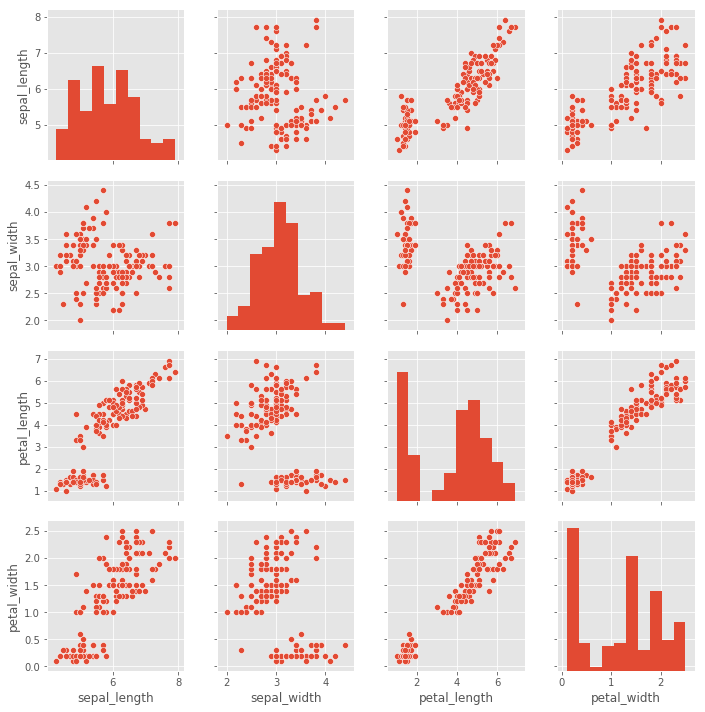

In [9]:
sns.pairplot(X)

I spy 2 very distinct clusters.
![2 clusters](./2 cluster.png)

I spy 4 somewhat distinct clusters.  2 which are dense and 2 which are not so dense or populous.
![4 cluster](./4 cluster.png)

A bit more insane but we could draw 5 straight (non-horizontal lines) to divide our data into 6 more specific clusters...
![5 split](./6 cluster.png)


### 3. Cluster the data using K-Means

- Select a number of clusters of your choice based on your visual analysis above.

In [10]:
# lets say I choose K=4
k = 4
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

**3.2 Compute the labels and centroids.**

In [11]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

### 4. Visually evaluate the clusters.
- Compare the predicted labels vs. the actual labels.

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y)
le.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [13]:
species_ind = le.transform(y)

Text(0.5,1,u'K-Means Clusters')

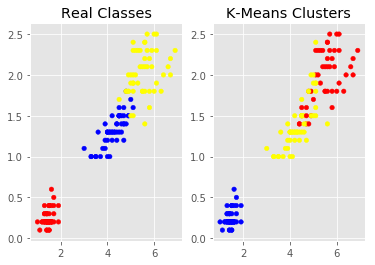

In [34]:
colormap = np.array(['red', 'blue', 'yellow', 'green'])

plt.subplot(1, 2, 1)
plt.scatter(X.petal_length, X.petal_width, c=colormap[species_ind], s=20)
plt.title('Real Classes')
 
plt.subplot(1, 2, 2)
plt.scatter(X.petal_length, X.petal_width, c=colormap[labels], s=20)
plt.title('K-Means Clusters')

### 5. Check the centroids and plot them along two of the features.

In [15]:
print(centroids)

[[6.2525     2.855      4.815      1.625     ]
 [5.006      3.428      1.462      0.246     ]
 [6.9125     3.1        5.846875   2.13125   ]
 [5.53214286 2.63571429 3.96071429 1.22857143]]


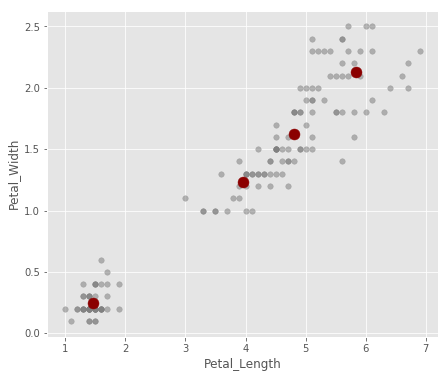

In [35]:
fig, ax = plt.subplots(figsize=(7,6))
ax.scatter(X.petal_length, X.petal_width, c='grey', alpha=0.55, s=30)
ax.scatter(centroids[:,2], centroids[:,3], c='darkred', s=120)
plt.xlabel('Petal_Length')
plt.ylabel('Petal_Width')
plt.show()

### 6. Compute the silhoutte score for your clusters.

What does the score indicate?

In [17]:
metrics.silhouette_score(X, labels, metric='euclidean')

0.4980505049972883

In [18]:
# The score is positive (though not 1.), indicating that there is decent separation
# and coherence with 4 clusters.

### 7. Plot the silhouette score for K = 2,3,4,5,6,7,8

You will need to fit a new model for each one. You can standardize your data before iterating through the clusters or not, up to you.

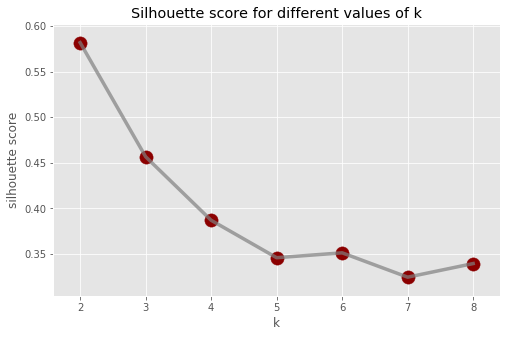

In [32]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs = ss.fit_transform(X)

sils = []
for k in [2,3,4,5,6,7,8]:
    km = cluster.KMeans(n_clusters=k)
    km.fit(Xs)
    sils.append(metrics.silhouette_score(Xs, km.labels_, metric='euclidean'))
    
fig, ax = plt.subplots(figsize=(8,5))
ax.plot([2,3,4,5,6,7,8], sils, c='grey', lw=3.5, alpha=0.7)
ax.scatter([2,3,4,5,6,7,8], sils, c='darkred', s=175)
plt.title('Silhouette score for different values of k')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.show()

### 8. Plot the inertia score for the different K clusters.

Is there an "elbow" to select a good number of clusters or not?

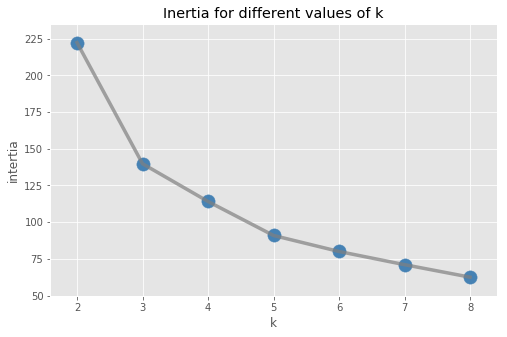

In [33]:
inertias = []
for k in [2,3,4,5,6,7,8]:
    km = cluster.KMeans(n_clusters=k)
    km.fit(Xs)
    inertias.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(8,5))
ax.plot([2,3,4,5,6,7,8], inertias, c='grey', lw=3.5, alpha=0.7)
ax.scatter([2,3,4,5,6,7,8], inertias, c='steelblue', s=175)
plt.title('Inertia for different values of k')
plt.xlabel('k')
plt.ylabel('intertia')
plt.show()

### 9. Fit a K-Means with 3 clusters and pull out the cluster labels. Pull out the true labels as well.

Once you have both, adjust the predicted cluster labels to correspond to the true labels. For example, cluster 0 should correspond roughly to species 0, cluster 1 to species 1, and cluster 2 to species 2.

In [20]:
species_ind

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
km3 = cluster.KMeans(n_clusters=3)
km3.fit(Xs)

labels = km3.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [22]:
df_temp = pd.DataFrame()
df_temp['real'] = species_ind
df_temp['clusters'] = labels

In [23]:
df_temp.head()

,real,clusters
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [24]:
1.*len(df_temp[df_temp['real']==df_temp['clusters']])/len(df_temp)

0.09333333333333334

In [25]:
for i in [0,1,2]:
    df_temp_c = df_temp[df_temp['real']==i]
    print(i,1.*len(df_temp_c[df_temp_c['real']==df_temp_c['clusters']])/len(df_temp_c))

(0, 0.0)
(1, 0.0)
(2, 0.28)


In [26]:
# 0 is obvious, 1 and 2 seem good enough 

### 10. Calculate the completeness, homogeneity, V measure, and mutual information (adjusted) using the predicted clusters and the true labels.

In [27]:
from sklearn.metrics import completeness_score, homogeneity_score, v_measure_score, adjusted_mutual_info_score

In [28]:
print completeness_score(species_ind, labels)

0.6598476779627759


In [29]:
print homogeneity_score(species_ind, labels)

0.6591265018049008


In [30]:
print v_measure_score(species_ind, labels)

0.659486892724918


In [31]:
print adjusted_mutual_info_score(species_ind, labels)

0.6548603058807271
